
# Analysis Summary and Problems in Hierarchical Classification

## I. Analysis Summary

### A. Initial Distribution Analysis

#### Level 1 (Cat1)
- 6 total categories
- No rare categories
- Well-balanced (imbalance ratio 4.29:1)

#### Level 2 (Cat2)
- 64 total categories
- 22 rare categories (34.38%)
- 408 samples in rare categories
- Average 18.55 samples per rare category

#### Level 3 (Cat3)
- 377 total categories
- 327 rare categories (86.74%)
- 3,288 samples in rare categories
- Average 10.06 samples per rare category

### B. Hierarchical Analysis

#### Most Problematic Parent Categories

1. **Grocery/Gourmet Food**
   - Candy/Chocolate: 17 rare subcategories, 73 samples
   - Snack Food: 11 rare subcategories
   - Pantry Staples: 6 rare subcategories

2. **Pet Supplies**
   - Fish/Aquatic Pets: 10 rare subcategories, 39 samples

3. **Baby Products**
   - Safety: 8 rare subcategories, 39 samples
   - Diapering: 6 rare subcategories

### C. Path Analysis
- 257 rare paths identified
- Most paths with rare categories have ~9 samples
- Strong hierarchical patterns in health/personal care categories
- Significant fragmentation in toy/game categories

### D. Similarity Analysis
- Strong similarities between related product categories
- Cross-category similarities identified
- 'Unknown' category shows high similarity with multiple categories
- Some rare categories show strong semantic relationships with frequent categories

## II. Identified Problems

### A. Data Imbalance Issues
- Severe imbalance at Cat3 level (86.74% rare categories)
- Moderate imbalance at Cat2 level (34.38% rare categories)
- Long-tail distribution in category frequencies

### B. Hierarchical Challenges
- Some rare Cat3s have multiple parent Cat2s
- Inconsistent category granularity across different branches
- Some parent categories have many rare children

### C. Category Quality Issues
- Presence of 'unknown' category
- Potential redundant or overlapping categories
- Inconsistent category naming/organization

### D. Sample Size Problems
- Many categories with < 10 samples
- Insufficient data for reliable classification
- Risk of overfitting for rare categories

### E. Structural Issues
- Some categories might be too granular
- Inconsistent hierarchy depth
- Potential missing intermediate categories

### F. Classification Challenges
- Multi-label classification needed for some categories
- Complex hierarchical dependencies
- Need for different strategies at different levels

## III. Key Metrics

### Thresholds Impact
| Threshold | Rare Cat3s | % of Samples |
|-----------|------------|--------------|
| 5         | 144        | 3.1%         |
| 10        | 209        | 7.68%        |
| 20        | 269        | 15.89%       |
| 30        | 303        | 23.73%       |
| 50        | 327        | 32.88%       |

## IV. Next Steps

### A. Category Consolidation
- How to merge rare categories
- Which categories to keep separate
- Handling of the 'unknown' category

### B. Hierarchical Structure
- Optimal hierarchy depth
- Parent-child relationship optimization
- Cross-category relationships

### C. Classification Strategy
- Different approaches for different category levels
- Handling of multi-label cases
- Treatment of very rare categories


## Basic Distribution Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_category_distribution():
    print("\n=== Category Distribution Analysis ===")
    
    # Level 1 Analysis
    print("\nLevel 1 (Cat1) Distribution:")
    cat1_counts = df['Cat1'].value_counts()
    print(cat1_counts)
    print(f"\nTotal unique categories in Level 1: {len(cat1_counts)}")
    
    # Level 2 Analysis
    print("\nLevel 2 (Cat2) Distribution (top 10):")
    cat2_counts = df['Cat2'].value_counts()
    print(cat2_counts.head(10))
    print(f"\nTotal unique categories in Level 2: {len(cat2_counts)}")
    
    # Level 3 Analysis
    print("\nLevel 3 (Cat3) Distribution (top 10):")
    cat3_counts = df['Cat3'].value_counts()
    print(cat3_counts.head(10))
    print(f"\nTotal unique categories in Level 3: {len(cat3_counts)}")
    
    return cat1_counts, cat2_counts, cat3_counts

def plot_category_distributions(cat1_counts, cat2_counts, cat3_counts):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 20))
    # Level 1 Plot
    sns.barplot(x=cat1_counts.values, y=cat1_counts.index, ax=ax1)
    ax1.set_title('Level 1 Category Distribution')
    ax1.set_xlabel('Count')
    
    # Level 2 Plot (top 15)
    sns.barplot(x=cat2_counts.head(15).values, y=cat2_counts.head(15).index, ax=ax2)
    ax2.set_title('Level 2 Category Distribution (Top 15)')
    ax2.set_xlabel('Count')
    
    # Level 3 Plot (top 15)
    sns.barplot(x=cat3_counts.head(15).values, y=cat3_counts.head(15).index, ax=ax3)
    ax3.set_title('Level 3 Category Distribution (Top 15)')
    ax3.set_xlabel('Count')
    
    plt.tight_layout()
    plt.show()


### Thresholds Analysis

In [14]:
def analyze_thresholds(df, max_threshold=50):
    """Analyze and plot impact of different thresholds"""
    thresholds = range(1, max_threshold + 1)
    results = {
        'level1': [],
        'level2': [],
        'level3': []
    }
    l1_counts = df['Cat1'].value_counts()
    l2_counts = df.groupby(['Cat1', 'Cat2']).size()
    l3_counts = df.groupby(['Cat1', 'Cat2', 'Cat3']).size()
    
    category_stats = {
        'level1': l1_counts,
        'level2': l2_counts,
        'level3': l3_counts
    }
    for level in ['level1', 'level2', 'level3']:
        counts = category_stats[level]
        for threshold in thresholds:
            rare_cats = sum(counts < threshold)
            total_samples_affected = counts[counts < threshold].sum()
            results[level].append({
                'threshold': threshold,
                'rare_categories': rare_cats,
                'categories_remaining': len(counts) - rare_cats,
                'samples_affected': total_samples_affected,
                'samples_affected_pct': (total_samples_affected / len(df)) * 100
            })
    
    threshold_analysis = {
        level: pd.DataFrame(data) 
        for level, data in results.items()
    }

    fig, axes = plt.subplots(3, 2, figsize=(15, 20))
    
    for i, level in enumerate(['level1', 'level2', 'level3']):
        data = threshold_analysis[level]
        
        # Categories plot
        axes[i, 0].plot(data['threshold'], data['rare_categories'], 
                        label='Categories to merge')
        axes[i, 0].plot(data['threshold'], data['categories_remaining'], 
                        label='Categories remaining')
        axes[i, 0].set_title(f'{level} - Impact on Categories')
        axes[i, 0].set_xlabel('Threshold')
        axes[i, 0].set_ylabel('Number of Categories')
        axes[i, 0].legend()
        
        # Samples affected plot
        axes[i, 1].plot(data['threshold'], data['samples_affected_pct'])
        axes[i, 1].set_title(f'{level} - Samples Affected')
        axes[i, 1].set_xlabel('Threshold')
        axes[i, 1].set_ylabel('Samples Affected (%)')
        
    plt.tight_layout()
    plt.show()

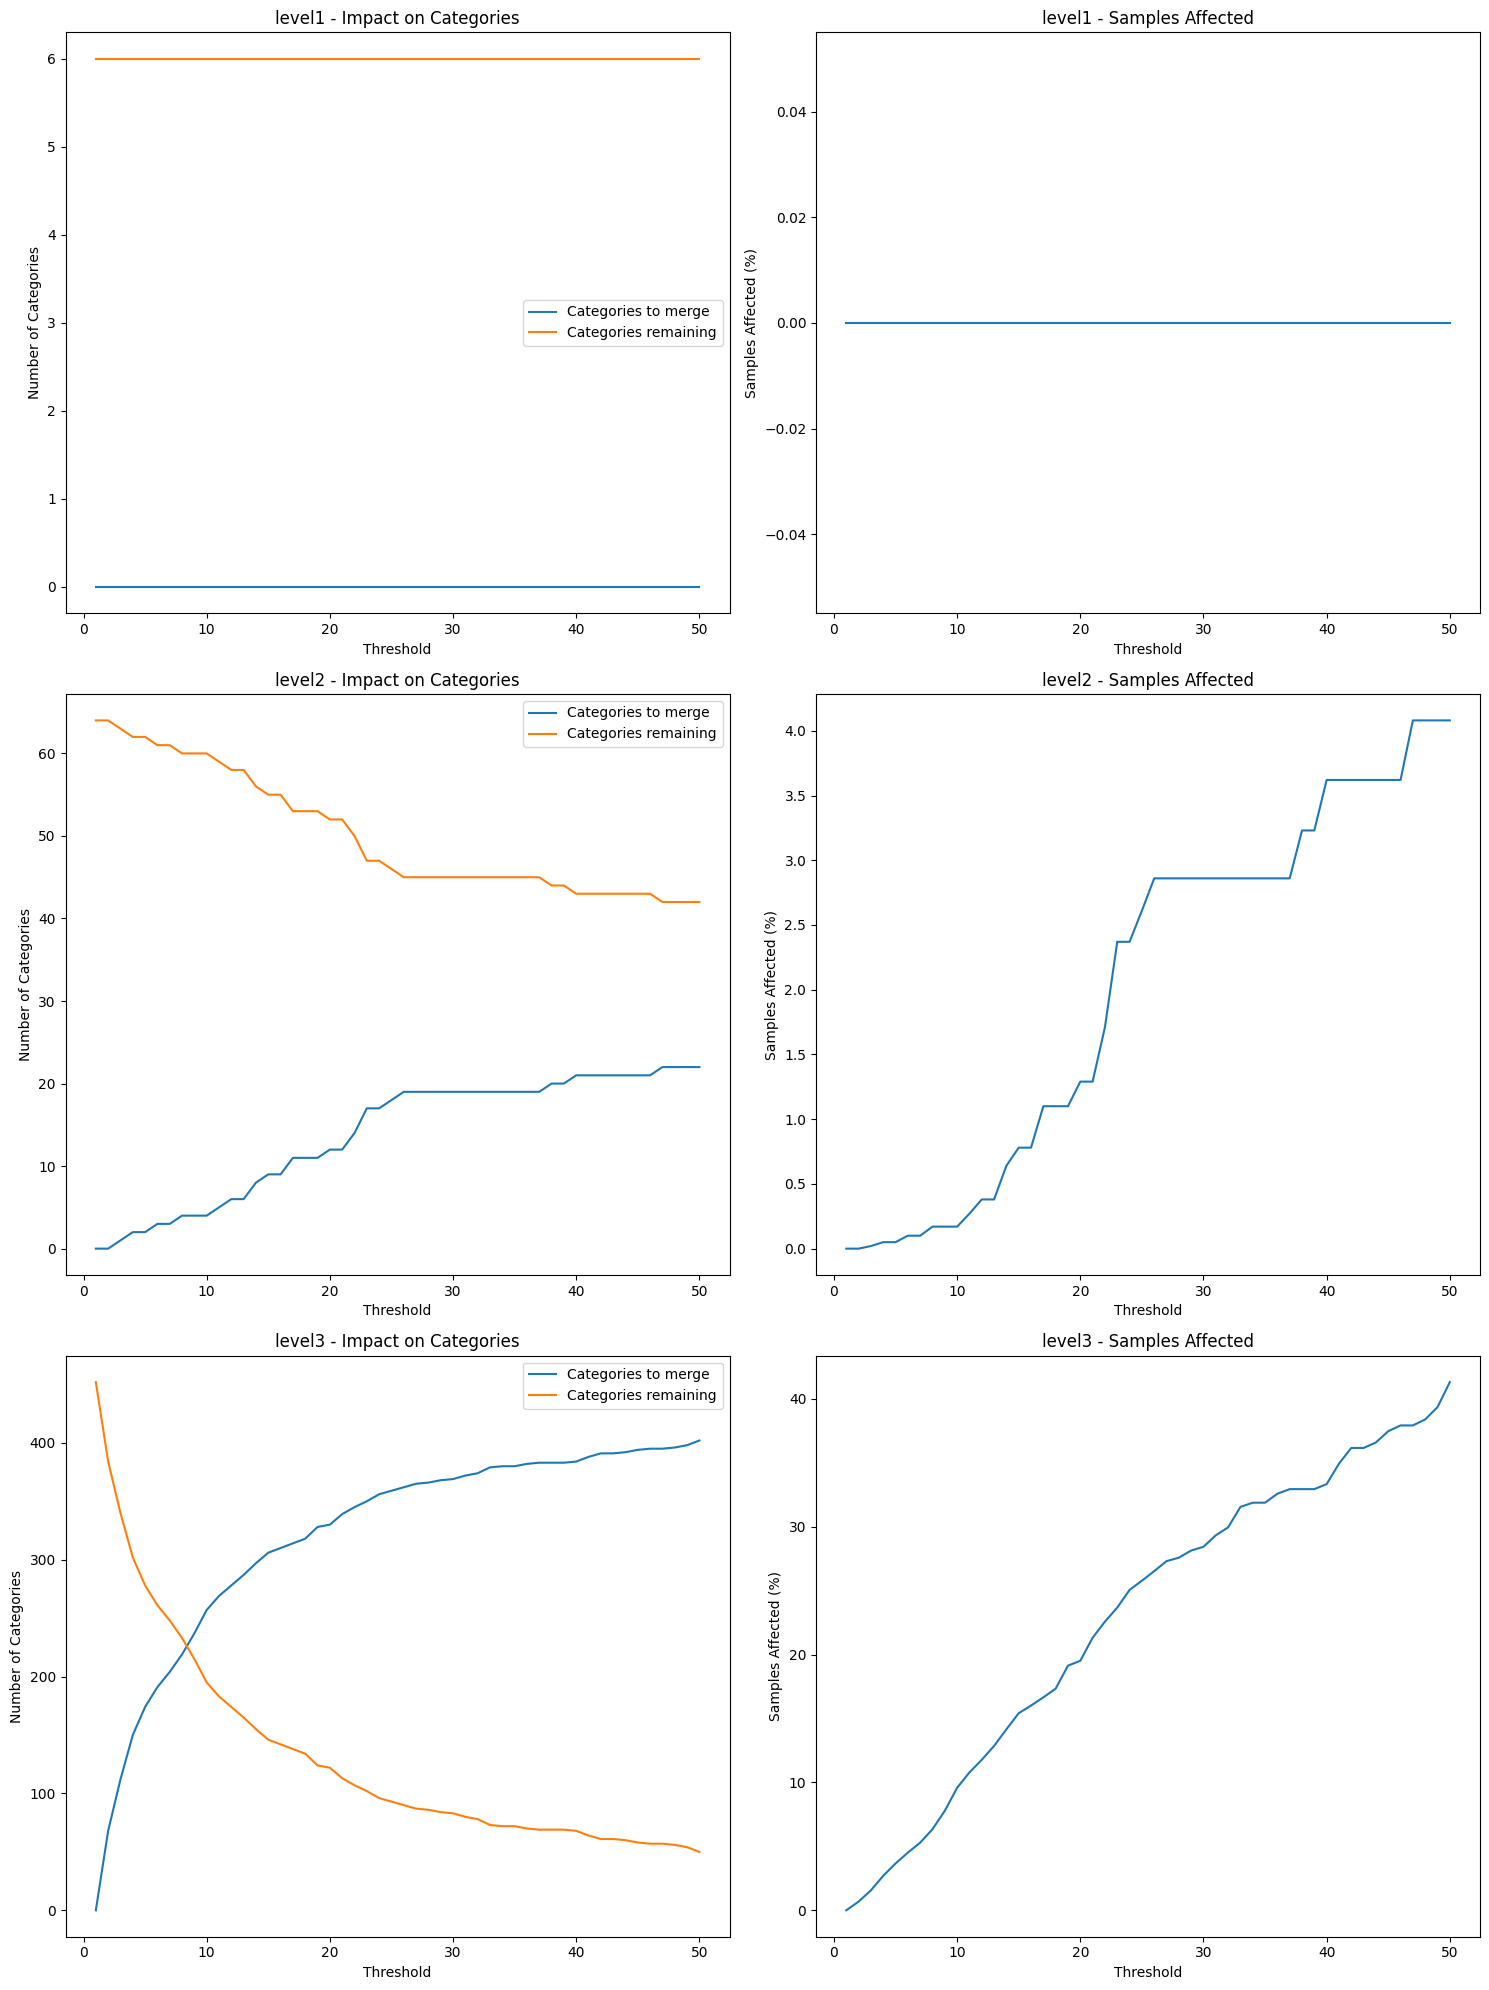

In [15]:
analyze_thresholds(df)

##  Hierarchical Relationship Analysis

In [ ]:
def analyze_hierarchical_relationships():
    print("\n=== Hierarchical Relationship Analysis ===")
    
    df['category_path'] = df.apply(lambda x: f"{x['Cat1']}>{x['Cat2']}>{x['Cat3']}", axis=1)
    unique_paths = df['category_path'].nunique()
    print(f"\nTotal unique category paths: {unique_paths}")
    
    # Analyze Cat2 distribution within each Cat1
    print("\nCategory 2 distribution within Category 1:")
    for cat1 in df['Cat1'].unique():
        cat2_in_cat1 = df[df['Cat1'] == cat1]['Cat2'].nunique()
        print(f"{cat1}: {cat2_in_cat1} unique Category 2 items")
    
    # Analyze potential multi-label cases
    print("\nAnalyzing multi-label cases:")
    cat2_per_cat3 = df.groupby('Cat3')['Cat2'].nunique()
    multi_label_cat3 = cat2_per_cat3[cat2_per_cat3 > 1]
    print(f"\nNumber of Category 3 items belonging to multiple Category 2: {len(multi_label_cat3)}")
    if len(multi_label_cat3) > 0:
        print("\nExample multi-label cases:")
        print(multi_label_cat3.head())



## Text Analysis


In [ ]:
def analyze_text_features():
    print("\n=== Text Feature Analysis ===")
    
    df['title_length'] = df['Title'].str.len()
    df['text_length'] = df['Text'].str.len()
    
    print("\nTitle length statistics:")
    print(df['title_length'].describe())
    
    print("\nText length statistics:")
    print(df['text_length'].describe())
    
    # Word count analysis
    df['title_word_count'] = df['Title'].str.split().str.len()
    df['text_word_count'] = df['Text'].str.split().str.len()
    
    print("\nTitle word count statistics:")
    print(df['title_word_count'].describe())
    
    print("\nText word count statistics:")
    print(df['text_word_count'].describe())
    
    # Plot length distributions
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    sns.histplot(df['title_length'], ax=ax1)
    ax1.set_title('Title Length Distribution')
    
    sns.histplot(df['text_length'], ax=ax2)
    ax2.set_title('Text Length Distribution')
    
    sns.histplot(df['title_word_count'], ax=ax3)
    ax3.set_title('Title Word Count Distribution')
    
    sns.histplot(df['text_word_count'], ax=ax4)
    ax4.set_title('Text Word Count Distribution')
    
    plt.tight_layout()
    plt.show()


## Data Quality Checks

In [ ]:
def analyze_data_quality():
    print("\n=== Data Quality Analysis ===")
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    print("\nDuplicate entries:")
    print(f"Total duplicate rows: {df.duplicated().sum()}")
    print(f"Duplicate titles: {df['Title'].duplicated().sum()}")
    
    print("\nEmpty text analysis:")
    print(f"Empty titles: {(df['Title'].str.strip() == '').sum()}")
    print(f"Empty text: {(df['Text'].str.strip() == '').sum()}")


Starting comprehensive dataset analysis...

=== Category Distribution Analysis ===

Level 1 (Cat1) Distribution:
Cat1
health personal care    2992
beauty                  2135
toys games              1759
pet supplies            1576
grocery gourmet food     840
baby products            698
Name: count, dtype: int64

Total unique categories in Level 1: 6

Level 2 (Cat2) Distribution (top 10):
Cat2
nutrition wellness            904
dogs                          875
health care                   648
hair care                     542
personal care                 528
fragrance                     514
skin care                     484
cats                          476
medical supplies equipment    418
makeup                        376
Name: count, dtype: int64

Total unique categories in Level 2: 64

Level 3 (Cat3) Distribution (top 10):
Cat3
vitamins supplements    665
unknown                 487
women s                 286
shaving hair removal    280
face                    262
toys     

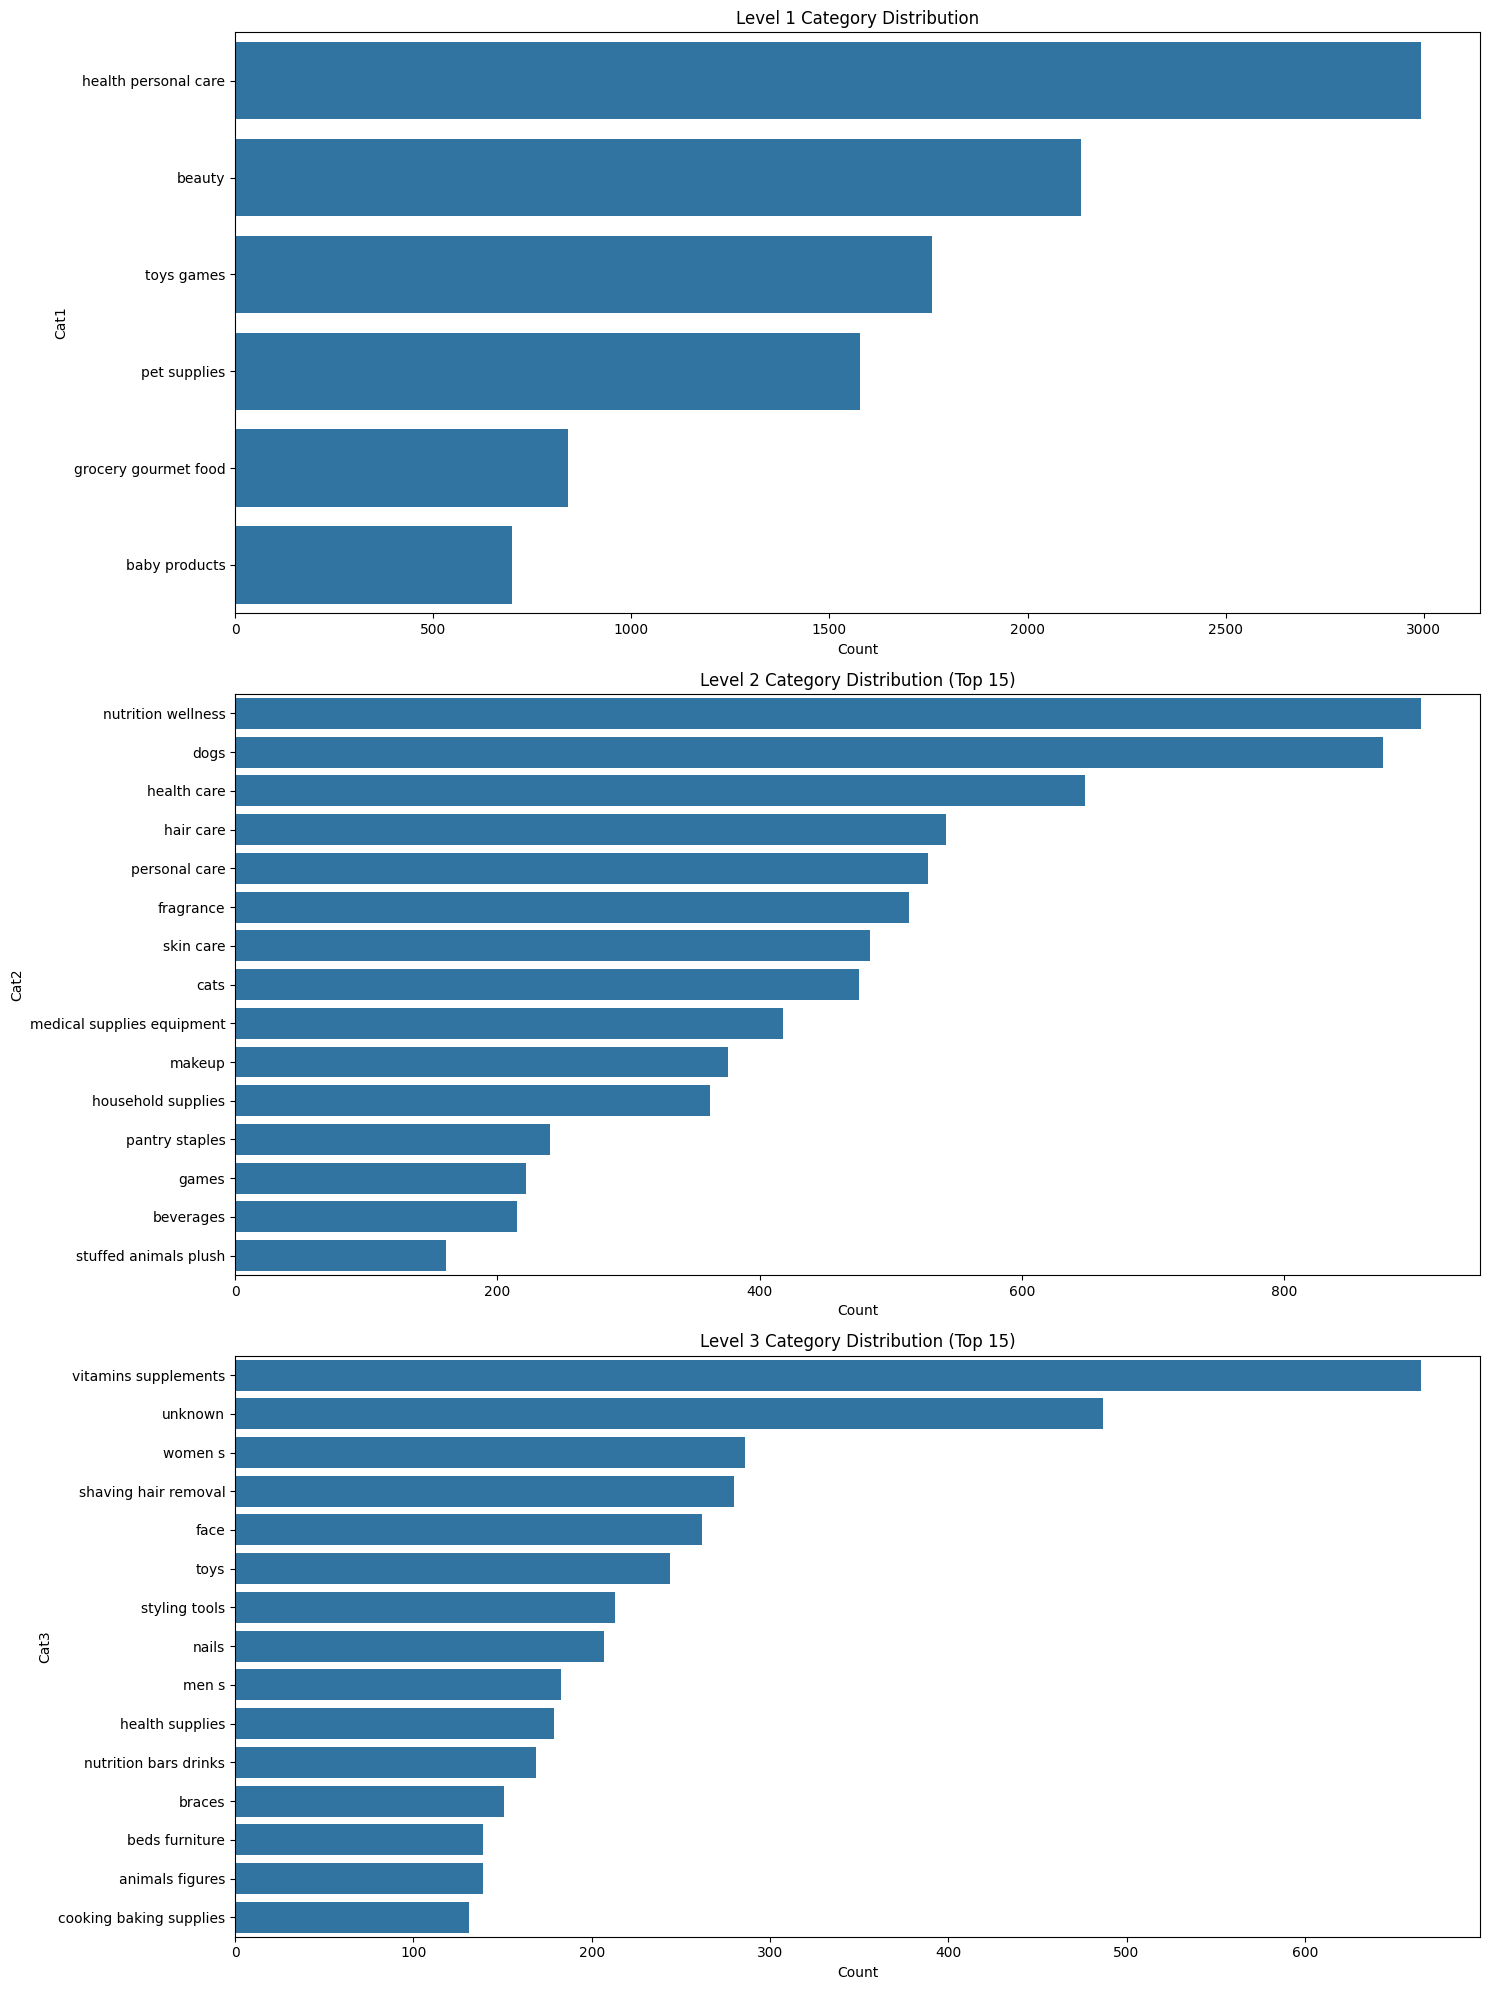


=== Hierarchical Relationship Analysis ===

Total unique category paths: 452

Category 2 distribution within Category 1:
pet supplies: 6 unique Category 2 items
health personal care: 7 unique Category 2 items
grocery gourmet food: 16 unique Category 2 items
toys games: 17 unique Category 2 items
beauty: 6 unique Category 2 items
baby products: 12 unique Category 2 items

Analyzing multi-label cases:

Number of Category 3 items belonging to multiple Category 2: 20

Example multi-label cases:
Cat3
accessories       3
beds furniture    2
body              2
collars           3
cookies           2
Name: Cat2, dtype: int64

=== Text Feature Analysis ===

Title length statistics:
count    9995.000000
mean       43.713657
std        20.475727
min         3.000000
25%        30.000000
50%        41.000000
75%        54.000000
max       479.000000
Name: title_length, dtype: float64

Text length statistics:
count    10000.000000
mean       313.597500
std        312.867499
min          4.000000


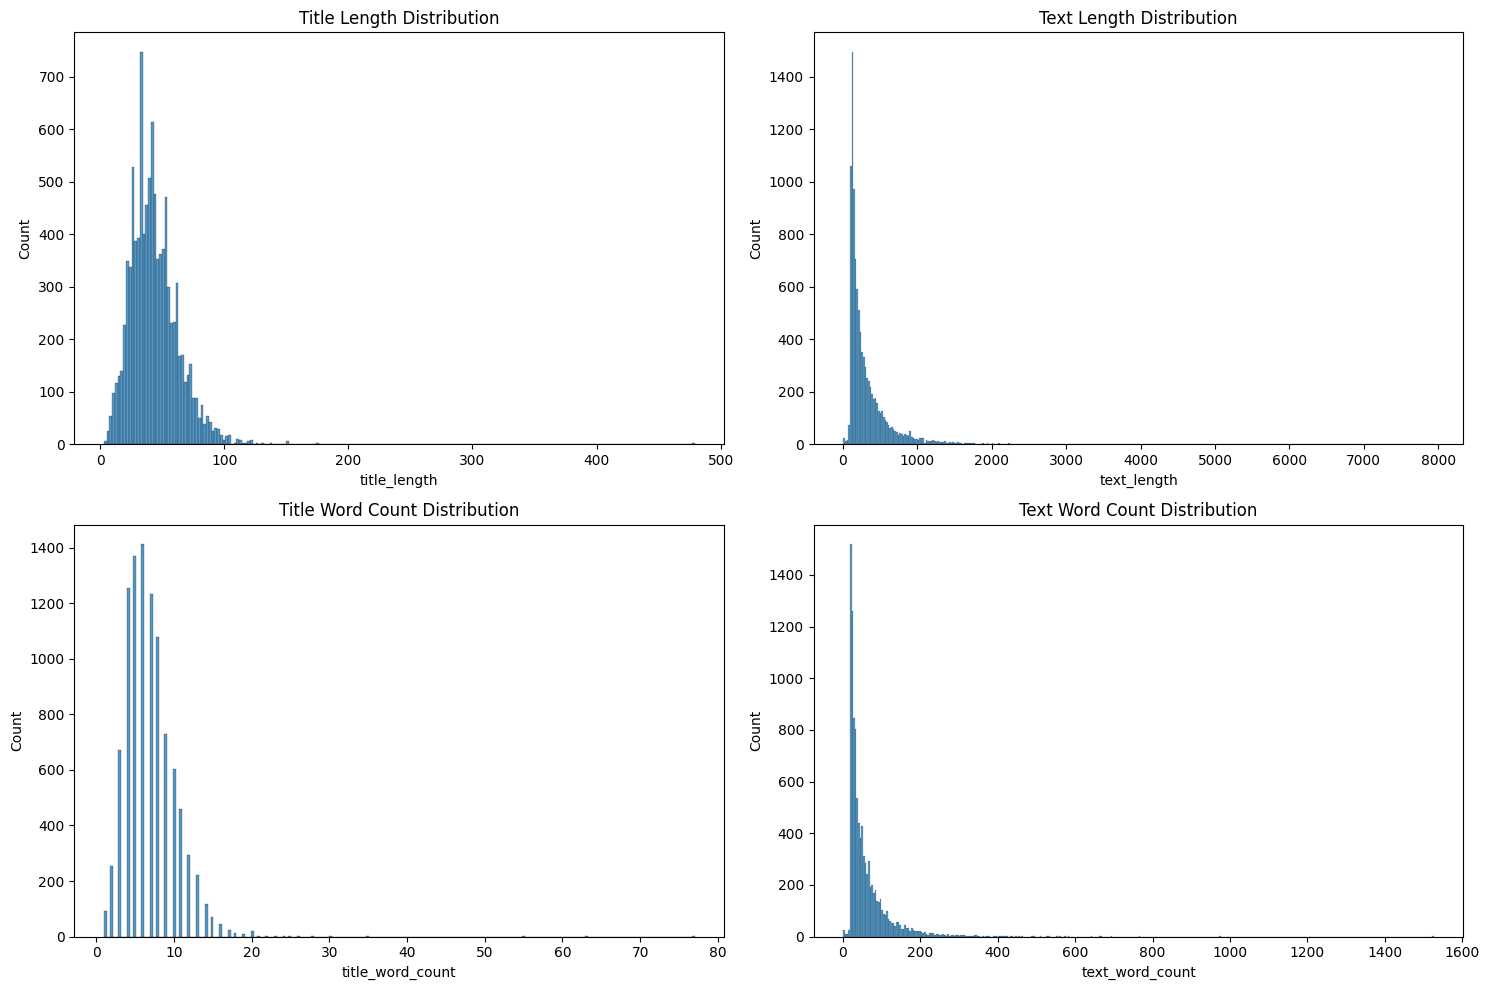


=== Data Quality Analysis ===

Missing values:
productId           0
Title               5
userId              0
Time                0
Text                0
Cat1                0
Cat2                0
Cat3                0
category_path       0
title_length        5
text_length         0
title_word_count    5
text_word_count     0
dtype: int64

Duplicate entries:
Total duplicate rows: 0
Duplicate titles: 3487

Empty text analysis:
Empty titles: 0
Empty text: 0

=== Key Insights ===
Total samples: 10000
Category 1 imbalance ratio: 4.29
Average text length: 313.60
Average title length: 43.71


In [ ]:
def run_complete_analysis(df):
    print("Starting comprehensive dataset analysis...")
    
    # Run all analyses
    cat1_counts, cat2_counts, cat3_counts = analyze_category_distribution()
    plot_category_distributions(cat1_counts, cat2_counts, cat3_counts)
    
    analyze_hierarchical_relationships()
    analyze_text_features()
    analyze_data_quality()
    
    # Additional insights
    print("\n=== Key Insights ===")
    print(f"Total samples: {len(df)}")
    print(f"Category 1 imbalance ratio: {cat1_counts.max() / cat1_counts.min():.2f}")
    print(f"Average text length: {df['text_length'].mean():.2f}")
    print(f"Average title length: {df['title_length'].mean():.2f}")

# Run the analysis
df = pd.read_csv('data.csv')
run_complete_analysis(df)


## Understanding Categories with less data Points

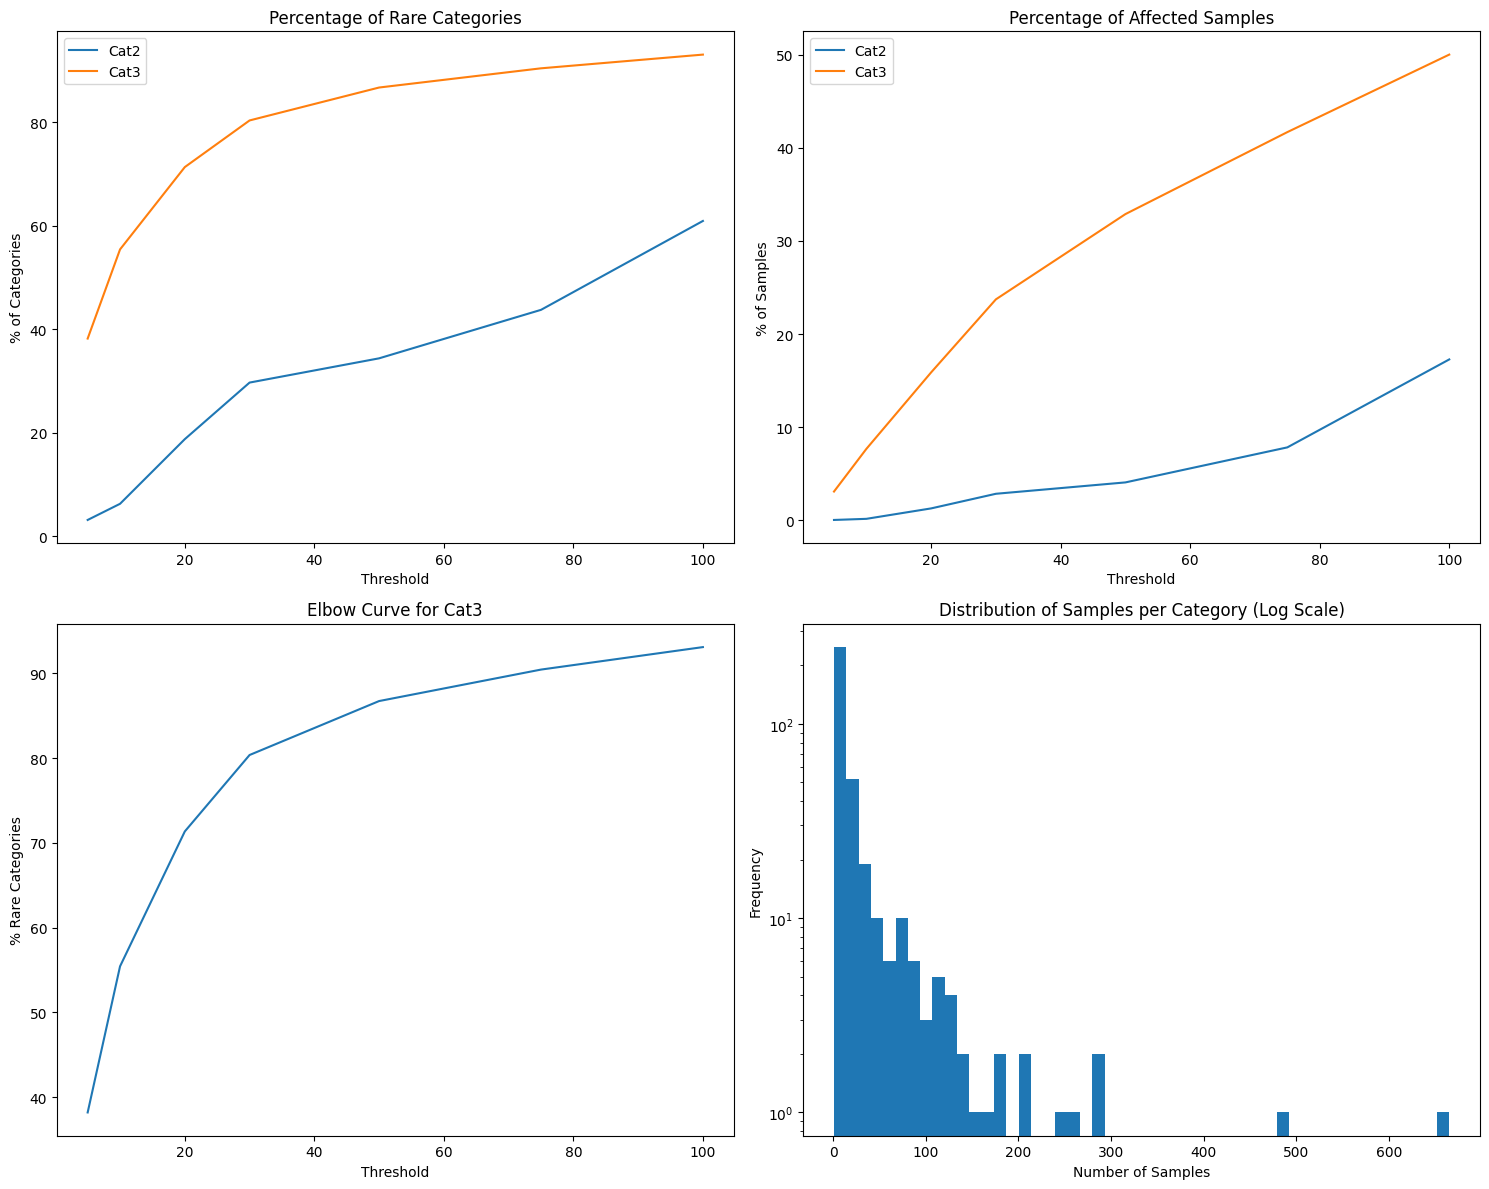

{('Cat2', 5): {'total_categories': 64,
  'rare_categories': 2,
  'rare_percentage': 3.125,
  'affected_samples': np.int64(5),
  'affected_samples_percentage': np.float64(0.05),
  'avg_samples_per_rare': np.float64(2.5)},
 ('Cat3', 5): {'total_categories': 377,
  'rare_categories': 144,
  'rare_percentage': 38.196286472148536,
  'affected_samples': np.int64(310),
  'affected_samples_percentage': np.float64(3.1),
  'avg_samples_per_rare': np.float64(2.1527777777777777)},
 ('Cat2', 10): {'total_categories': 64,
  'rare_categories': 4,
  'rare_percentage': 6.25,
  'affected_samples': np.int64(17),
  'affected_samples_percentage': np.float64(0.16999999999999998),
  'avg_samples_per_rare': np.float64(4.25)},
 ('Cat3', 10): {'total_categories': 377,
  'rare_categories': 209,
  'rare_percentage': 55.437665782493376,
  'affected_samples': np.int64(768),
  'affected_samples_percentage': np.float64(7.68),
  'avg_samples_per_rare': np.float64(3.674641148325359)},
 ('Cat2', 20): {'total_categories'

In [ ]:
def analyze_category_thresholds():
    """Analyze different threshold levels and their impact"""
    
    # Test different threshold values
    thresholds = [5, 10, 20, 30, 50, 75, 100]
    
    threshold_impacts = {}
    for threshold in thresholds:
        # For each level (focusing on Cat2 and Cat3)
        for level in ['Cat2', 'Cat3']:
            counts = df[level].value_counts()
            rare = counts[counts < threshold]
            
            impact = {
                'total_categories': len(counts),
                'rare_categories': len(rare),
                'rare_percentage': len(rare) / len(counts) * 100,
                'affected_samples': rare.sum(),
                'affected_samples_percentage': rare.sum() / len(df) * 100,
                'avg_samples_per_rare': rare.mean()
            }
            
            threshold_impacts[(level, threshold)] = impact
    
    # Plot impact analysis
    plot_threshold_impact(threshold_impacts)
    return threshold_impacts

def plot_threshold_impact(impacts):
    """Plot the impact of different thresholds"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    thresholds = sorted(set(t for _, t in impacts.keys()))
    
    # Plot percentage of rare categories
    for level in ['Cat2', 'Cat3']:
        rare_percentages = [impacts[(level, t)]['rare_percentage'] for t in thresholds]
        ax1.plot(thresholds, rare_percentages, label=level)
    ax1.set_title('Percentage of Rare Categories')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('% of Categories')
    ax1.legend()
    
    # Plot affected samples
    for level in ['Cat2', 'Cat3']:
        affected_samples = [impacts[(level, t)]['affected_samples_percentage'] for t in thresholds]
        ax2.plot(thresholds, affected_samples, label=level)
    ax2.set_title('Percentage of Affected Samples')
    ax2.set_xlabel('Threshold')
    ax2.set_ylabel('% of Samples')
    ax2.legend()

    ax3.plot(thresholds, [impacts[('Cat3', t)]['rare_percentage'] for t in thresholds])
    ax3.set_title('Elbow Curve for Cat3')
    ax3.set_xlabel('Threshold')
    ax3.set_ylabel('% Rare Categories')
    
    # Distribution of samples per category
    ax4.hist(df['Cat3'].value_counts(), bins=50, log=True)
    ax4.set_title('Distribution of Samples per Category (Log Scale)')
    ax4.set_xlabel('Number of Samples')
    ax4.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
analyze_category_thresholds()

Starting comprehensive category analysis...

Running hierarchical relationship analysis...

=== Parent Category Distribution for Rare Cat3 Categories ===

Top 10 parent combinations with most rare categories:
                                          count  nunique
Cat1                 Cat2                               
grocery gourmet food candy chocolate         73       17
pet supplies         fish aquatic pets       39       10
baby products        safety                  39        8
toys games           sports outdoor play     33        9
                     novelty gag toys        31        8
grocery gourmet food pantry staples          30        6
toys games           learning education      30        5
grocery gourmet food snack food              29       11
baby products        diapering               29        6
toys games           baby toddler toys       26        5

=== Parent Categories with Most Rare Children ===

Top 10 Cat2 categories with most rare children:
Cat2
ca

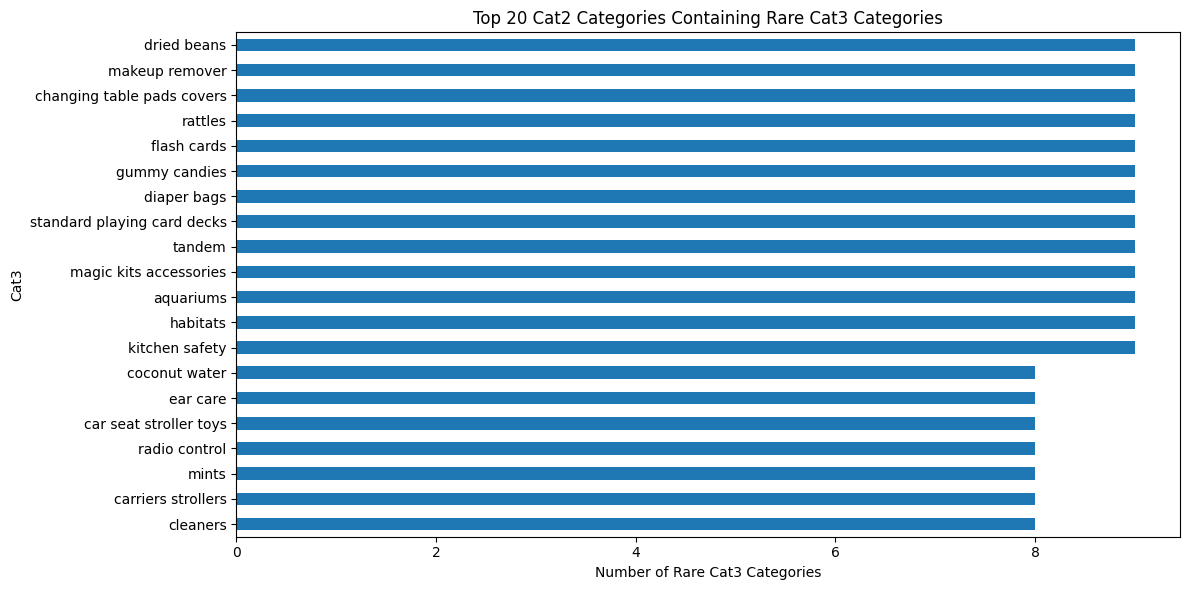


Running category similarity analysis...

=== Text Similarity Analysis for Categories ===

Analyzing similar categories for rare categories...

Similar categories to 'dried beans' (Cat2: pantry staples):
- spices seasonings (Cat2: herbs) : 0.551
- cooking baking supplies (Cat2: pantry staples) : 0.413
- unknown (Cat2: novelty gag toys) : 0.312
- cereals (Cat2: breakfast foods) : 0.303
- vitamins supplements (Cat2: nutrition wellness) : 0.260

Similar categories to 'kitchen safety' (Cat2: safety):
- pretend play (Cat2: dress up pretend play) : 0.342
- science (Cat2: learning education) : 0.327
- unknown (Cat2: novelty gag toys) : 0.327
- scooters wagons (Cat2: tricycles) : 0.310
- craft kits (Cat2: arts crafts) : 0.273

Similar categories to 'habitats' (Cat2: learning education):
- unknown (Cat2: novelty gag toys) : 0.369
- alternative medicine (Cat2: health care) : 0.307
- oral hygiene (Cat2: personal care) : 0.296
- science (Cat2: learning education) : 0.295
- first aid (Cat2: health 

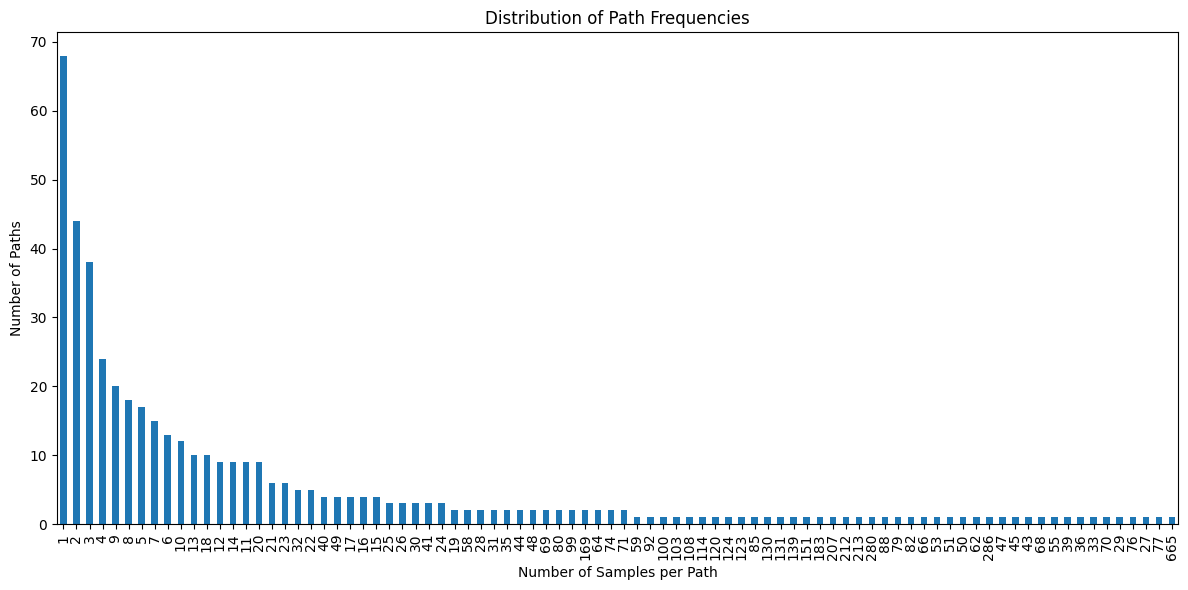


Analysis complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def analyze_hierarchical_relationships():
    """Analyze how rare categories are distributed across their parent categories"""
    
    cat3_counts = df['Cat3'].value_counts()
    
    # Define rare categories based on our threshold analysis
    rare_cat3 = set(cat3_counts[cat3_counts < 10].index)
    moderate_cat3 = set(cat3_counts[(cat3_counts >= 10) & (cat3_counts < 20)].index)
    
    print("\n=== Parent Category Distribution for Rare Cat3 Categories ===")
    parent_distribution = df[df['Cat3'].isin(rare_cat3)].groupby(['Cat1', 'Cat2'])['Cat3'].agg(['count', 'nunique'])
    print("\nTop 10 parent combinations with most rare categories:")
    print(parent_distribution.sort_values('count', ascending=False).head(10))
    
    print("\n=== Parent Categories with Most Rare Children ===")
    rare_children_by_parent = df[df['Cat3'].isin(rare_cat3)].groupby('Cat2')['Cat3'].nunique()
    print("\nTop 10 Cat2 categories with most rare children:")
    print(rare_children_by_parent.sort_values(ascending=False).head(10))
    
    return parent_distribution, rare_children_by_parent

def analyze_category_relationships():
    """Analyze relationships between categories at different levels"""
    
    print("\n=== Category Co-occurrence Analysis ===")
    cat2_cat3_matrix = pd.crosstab(df['Cat2'], df['Cat3'])
    
    # Analyze category overlap
    cat3_counts = df['Cat3'].value_counts()
    rare_cat3 = list(cat3_counts[cat3_counts < 10].index)  
    
    # Check if rare categories tend to co-occur with specific Cat2 categories
    rare_cat3_distribution = cat2_cat3_matrix[rare_cat3].sum()
    print("\nDistribution of rare Cat3 categories across Cat2:")
    print(rare_cat3_distribution.sort_values(ascending=False).head(10))
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    rare_cat3_distribution.sort_values(ascending=True).tail(20).plot(kind='barh')
    plt.title('Top 20 Cat2 Categories Containing Rare Cat3 Categories')
    plt.xlabel('Number of Rare Cat3 Categories')
    plt.tight_layout()
    plt.show()
    
    return cat2_cat3_matrix, rare_cat3_distribution

def analyze_category_similarity():
    """Analyze text similarity between categories to identify potential merging candidates"""
    
    print("\n=== Text Similarity Analysis for Categories ===")
    cat3_texts = df.groupby('Cat3').agg({
        'Text': ' '.join,
        'Cat2': 'first'  # Keep the parent category
    })
    
    # Create TF-IDF vectors
    tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
    cat3_vectors = tfidf.fit_transform(cat3_texts['Text'])
    
    similarity_matrix = cosine_similarity(cat3_vectors)
    

    cat3_counts = df['Cat3'].value_counts()
    rare_cat3 = list(cat3_counts[cat3_counts < 10].index)
    
    print("\nAnalyzing similar categories for rare categories...")
    rare_indices = [list(cat3_texts.index).index(cat) for cat in rare_cat3[:5]]  # Analyze first 5 rare categories
    
    for i, rare_cat in enumerate(rare_cat3[:5]):
        idx = rare_indices[i]
        similar_scores = similarity_matrix[idx]
        top_similar_idx = similar_scores.argsort()[-6:][::-1][1:]  # Get top 5 similar, excluding self
        
        print(f"\nSimilar categories to '{rare_cat}' (Cat2: {cat3_texts['Cat2'][rare_cat]}):")
        for sim_idx in top_similar_idx:
            similar_cat = cat3_texts.index[sim_idx]
            similarity_score = similar_scores[sim_idx]
            print(f"- {similar_cat} (Cat2: {cat3_texts['Cat2'][similar_cat]}) : {similarity_score:.3f}")
    
    return similarity_matrix, cat3_texts

def analyze_category_paths():
    """Analyze complete category paths to understand hierarchical patterns"""
    
    df['category_path'] = df['Cat1'] + '>' + df['Cat2'] + '>' + df['Cat3']
    
    # Analyze path frequencies
    path_counts = df['category_path'].value_counts()
    
    print("\n=== Category Path Analysis ===")
    print("\nMost common paths:")
    print(path_counts.head(10))
    
    # Analyze rare paths
    rare_paths = path_counts[path_counts < 10]
    print(f"\nNumber of rare paths: {len(rare_paths)}")
    print("\nExample rare paths:")
    print(rare_paths.head(10))
    
    # Plot distribution of path frequencies
    plt.figure(figsize=(12, 6))
    path_counts.value_counts().plot(kind='bar')
    plt.title('Distribution of Path Frequencies')
    plt.xlabel('Number of Samples per Path')
    plt.ylabel('Number of Paths')
    plt.tight_layout()
    plt.show()
    
    return path_counts, rare_paths

print("Starting comprehensive category analysis...")
print("\nRunning hierarchical relationship analysis...")
parent_dist, rare_children = analyze_hierarchical_relationships()

print("\nRunning category relationship analysis...")
cooccurrence_matrix, rare_dist = analyze_category_relationships()

print("\nRunning category similarity analysis...")
similarity_matrix, cat3_texts = analyze_category_similarity()

print("\nRunning category path analysis...")
path_counts, rare_paths = analyze_category_paths()

print("\nAnalysis complete!")



# Analysis Summary and Problems in Hierarchical Classification

## I. Analysis Summary

### A. Initial Distribution Analysis

#### Level 1 (Cat1)
- 6 total categories
- No rare categories
- Well-balanced (imbalance ratio 4.29:1)

#### Level 2 (Cat2)
- 64 total categories
- 22 rare categories (34.38%)
- 408 samples in rare categories
- Average 18.55 samples per rare category

#### Level 3 (Cat3)
- 377 total categories
- 327 rare categories (86.74%)
- 3,288 samples in rare categories
- Average 10.06 samples per rare category

### B. Hierarchical Analysis

#### Most Problematic Parent Categories

1. **Grocery/Gourmet Food**
   - Candy/Chocolate: 17 rare subcategories, 73 samples
   - Snack Food: 11 rare subcategories
   - Pantry Staples: 6 rare subcategories

2. **Pet Supplies**
   - Fish/Aquatic Pets: 10 rare subcategories, 39 samples

3. **Baby Products**
   - Safety: 8 rare subcategories, 39 samples
   - Diapering: 6 rare subcategories

### C. Path Analysis
- 257 rare paths identified
- Most paths with rare categories have ~9 samples
- Strong hierarchical patterns in health/personal care categories
- Significant fragmentation in toy/game categories

### D. Similarity Analysis
- Strong similarities between related product categories
- Cross-category similarities identified
- 'Unknown' category shows high similarity with multiple categories
- Some rare categories show strong semantic relationships with frequent categories

## II. Identified Problems

### A. Data Imbalance Issues
- Severe imbalance at Cat3 level (86.74% rare categories)
- Moderate imbalance at Cat2 level (34.38% rare categories)
- Long-tail distribution in category frequencies

### B. Hierarchical Challenges
- Some rare Cat3s have multiple parent Cat2s
- Inconsistent category granularity across different branches
- Some parent categories have many rare children

### C. Category Quality Issues
- Presence of 'unknown' category
- Potential redundant or overlapping categories
- Inconsistent category naming/organization

### D. Sample Size Problems
- Many categories with < 10 samples
- Insufficient data for reliable classification
- Risk of overfitting for rare categories

### E. Structural Issues
- Some categories might be too granular
- Inconsistent hierarchy depth
- Potential missing intermediate categories

### F. Classification Challenges
- Multi-label classification needed for some categories
- Complex hierarchical dependencies
- Need for different strategies at different levels

## III. Key Metrics

### Thresholds Impact
| Threshold | Rare Cat3s | % of Samples |
|-----------|------------|--------------|
| 5         | 144        | 3.1%         |
| 10        | 209        | 7.68%        |
| 20        | 269        | 15.89%       |
| 30        | 303        | 23.73%       |
| 50        | 327        | 32.88%       |

## IV. Next Steps

### A. Category Consolidation
- How to merge rare categories
- Which categories to keep separate
- Handling of the 'unknown' category

### B. Hierarchical Structure
- Optimal hierarchy depth
- Parent-child relationship optimization
- Cross-category relationships

### C. Classification Strategy
- Different approaches for different category levels
- Handling of multi-label cases
- Treatment of very rare categories
